## Web Scraping and Data Analysis on OYO Hotel Rooms

##### Life Cycle of the Data Analyst Project:

*  1) Business Understanding (Understand the Business functionalities beofore we go furthur)
*  2) Data Requirement (Should know important variables)
*  3) Data Collection(We Use Web Scraping)
*  4) Data Cleaning ( Missing Data, Pre processing) 
*  5) Data Analysis (EDA) to know insight about data 



#### Steps Involved

* Identify the URL from which you need the data.
* Inspect the HTML code behind the page.
* Find the elements you want to extract.
* Write the code the store the data in the required format.

#### Python libraries used:


* requests: This is used to extract the HTML code from the given URL.
* BeautifulSoup: This is used to format and read the HTML content.
* re
* Numpy, Pandas, matplotlib, Seaborn etc..,

#### Problem statement :
    Based on my analysis, I want to show which is the budgetfriendly city with all features to book OYO Rooms.

#### I have shown the data acoording to this questions in Univariate Analysis ,Bivariate and Multivariate!!
* Which is the highest Review?
* Where the Offer_Percentage maximum density?
* Where the Offer_Price maximum density?
* Where the Original_Price maximum density?
* Where the Rating maximum density?
* what is the peak point of Offer_Percentage by using KDE plot?
* what is the AC_Availability count?
* what is the Wifi_Availability count?
* At what percentage the Offer_Percentage count is maximum ?
* Which Rating has maximum count?
* What is relation between City_Name and OriginalPrice and at what city price is maximum by violin ?
* At what city the OfferPrice is maximum by using barplot?
* What is the variation between Offer_Percentage and Original_Price by using line plot?
* What is the variation between Offer_Percentage and Original_Price by using reg plot?
* What is the variation between Offer_Price and Rating by using reg plot?
* How is the Wifi_Availability according to Original_Price by using Box plot to analise the outlayers ?
* How is the Wifi_Availability according to Offer_Price by using Box plot to analise the outlayers ?
* What is the Relation between Reviews and Wifi_Availability by using crosstab ?
* what is the Realtion between City_Name and AC_Availability by using crosstab ?
* what is the Realtion between City_Name and Wifi_Availability by using crosstab ?
* what is the Realtion between Offer_Percentage and City_Name by using crosstab ?
* I have group the data for Offer_Price and City_Name where the Offer_Price is minimum ?
* I have group the data for Offer_Price and City_Name where the Offer_Price is maximum ?
* On the basis of City_Name I have shown the analysis for all the columns by using pair plot?
* I have shown subplots for Wifi_Availability by using countplot and for Rating and Offer_Percentage by using boxplot and for all the columns by using heatmap of correlation and for Offer_Percentage and Wifi_Availability by using scatter plot

### Import all the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Load the URL that has to scrape

In [2]:
URL='https://www.oyorooms.com/hotels-in-hyderabad/'

In [3]:
page=requests.get(URL,headers = {'User-Agent':'Mozilla/5.0'})

In [4]:
page.status_code

200

In [5]:
pagecontent = page.text

In [6]:
pagecontent

'\n    <!doctype html>\n    <html lang="en" dir=ltr>\n    <head>\n      <meta charSet="utf-8" />\n      <meta httpEquiv="x-ua-compatible" content="ie=edge; chrome=1" />\n      <meta name="google-site-verification" content="lCkLu-7S0Eb5LOgDgmoWxSWzbopNfzKW01ZEe3ldsOc" />\n      <script type="text/javascript">\n      \twindow.renderingSource=\'server\'\n        var host = window.location.hostname;\n        if (!String.prototype.endsWith) {\n\t        String.prototype.endsWith = function(search, this_len) {\n\t\t        if (this_len === undefined || this_len > this.length) {\n\t\t\t        this_len = this.length;\n\t\t        }\n\t      \t  return this.substring(this_len - search.length, this_len) === search;\n\t        };\n        }\n        if (! (host.endsWith("oyorooms.com") || host.endsWith("oyorooms.ms") || host.endsWith("oyohotels.co.jp") || host.endsWith("hotelesoyo.com") || host.endsWith("oyohotels.com") || host.endsWith("belvilla.co.in") || host.endsWith("oyorooms.io")) && host.

### Load and explore the BeautifulSoup


#### * Beautiful Soup :
    Beautiful Soup is a Python library that is used for web scraping purposes to pull the data out of HTML and XML files

In [7]:
soup = BeautifulSoup(pagecontent)

In [8]:
soup

<!DOCTYPE html>
<html dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge; chrome=1" httpequiv="x-ua-compatible"/>
<meta content="lCkLu-7S0Eb5LOgDgmoWxSWzbopNfzKW01ZEe3ldsOc" name="google-site-verification"/>
<script type="text/javascript">
      	window.renderingSource='server'
        var host = window.location.hostname;
        if (!String.prototype.endsWith) {
	        String.prototype.endsWith = function(search, this_len) {
		        if (this_len === undefined || this_len > this.length) {
			        this_len = this.length;
		        }
	      	  return this.substring(this_len - search.length, this_len) === search;
	        };
        }
        if (! (host.endsWith("oyorooms.com") || host.endsWith("oyorooms.ms") || host.endsWith("oyohotels.co.jp") || host.endsWith("hotelesoyo.com") || host.endsWith("oyohotels.com") || host.endsWith("belvilla.co.in") || host.endsWith("oyorooms.io")) && host.indexOf('localhost') < 0){
          window.location.href="https://www.

In [9]:
soup.find_all('h3',attrs={'class':'listingHotelDescription__hotelName'})

[<h3 class="listingHotelDescription__hotelName d-textEllipsis" itemprop="name" title="SPOT ON 65122 K-inn">SPOT ON 65122 K-inn</h3>,
 <h3 class="listingHotelDescription__hotelName d-textEllipsis" itemprop="name" title="SPOT ON 47118 Pummy Lodge">SPOT ON 47118 Pummy Lodge</h3>,
 <h3 class="listingHotelDescription__hotelName d-textEllipsis" itemprop="name" title="OYO 38397 Kucheria Vatika">OYO 38397 Kucheria Vatika</h3>,
 <h3 class="listingHotelDescription__hotelName d-textEllipsis" itemprop="name" title="Silverkey Executive Stays 22453 Himayat Nagar Circle">Silverkey Executive Stays 22453 Himayat Nagar Circle</h3>,
 <h3 class="listingHotelDescription__hotelName d-textEllipsis" itemprop="name" title="Oyo Flagship 77043 Malkajgiri">Oyo Flagship 77043 Malkajgiri</h3>,
 <h3 class="listingHotelDescription__hotelName d-textEllipsis" itemprop="name" title="OYO Townhouse 113 The Shubham Dilsukhnaga">OYO Townhouse 113 The Shubham Dilsukhnaga</h3>,
 <h3 class="listingHotelDescription__hotelName d

In [10]:
soup.find('h3',attrs={'class':'listingHotelDescription__hotelName'})

<h3 class="listingHotelDescription__hotelName d-textEllipsis" itemprop="name" title="SPOT ON 65122 K-inn">SPOT ON 65122 K-inn</h3>

In [11]:
soup.find_all('span',attrs={'class':'listingPrice__finalPrice'})

[<span class="listingPrice__finalPrice">₹730</span>,
 <span class="listingPrice__finalPrice">₹708</span>,
 <span class="listingPrice__finalPrice">₹1351</span>,
 <span class="listingPrice__finalPrice">₹1462</span>,
 <span class="listingPrice__finalPrice">₹1216</span>,
 <span class="listingPrice__finalPrice">₹1630</span>,
 <span class="listingPrice__finalPrice">₹1216</span>,
 <span class="listingPrice__finalPrice">₹1666</span>,
 <span class="listingPrice__finalPrice">₹892</span>,
 <span class="listingPrice__finalPrice">₹1249</span>,
 <span class="listingPrice__finalPrice">₹1771</span>,
 <span class="listingPrice__finalPrice">₹1608</span>,
 <span class="listingPrice__finalPrice">₹1282</span>,
 <span class="listingPrice__finalPrice">₹1501</span>,
 <span class="listingPrice__finalPrice">₹1014</span>,
 <span class="listingPrice__finalPrice">₹1371</span>,
 <span class="listingPrice__finalPrice">₹1014</span>,
 <span class="listingPrice__finalPrice">₹1536</span>,
 <span class="listingPrice__fin

In [12]:
for x in soup.find_all('h3',attrs={'class':'listingHotelDescription__hotelName'}):
    print(x.text)

SPOT ON 65122 K-inn
SPOT ON 47118 Pummy Lodge
OYO 38397 Kucheria Vatika
Silverkey Executive Stays 22453 Himayat Nagar Circle
Oyo Flagship 77043 Malkajgiri
OYO Townhouse 113 The Shubham Dilsukhnaga
OYO 70822 Pnd Complex
Capital O 65104 Che Sigma Hotel
SPOT ON 75815 Hotel Kanha Residency
OYO 22907 Hotel Holiday
OYO Townhouse 77018 Gangothri
OYO 77115 Hotel Vaishnavi Palace
OYO 16428 Hotel Comfort Inn
Capital O 23543 Hotel Vaishnavi
OYO 78865 Raga Stays 
OYO 15928 Hotel Midtown
OYO 81097 SilverKey Halcyon Magnus
Capital O 71317 White Ridge
OYO 71439 Rsquare Elite
OYO 61506 Sai Residency


### Collecting the data using BeautifulSoup and Extracting the data


### * Scraping OYO Rooms

In [13]:
hotelname = []
address=[]
offerprice =[]
originalprice =[]
rating =[]
reviews = []
facilities = []
offerpercentage=[]
pagenum=[]
start_time=time.time()
City_name=[]
cities = ['Mumbai','Bangalore','Hyderabad']
for i in range(1,12):
    for val in cities:
        URL="https://www.oyorooms.com/hotels-in-{}/?page={}".format(val,i)
        page=requests.get(URL,headers = {'User-Agent':'Mozilla/5.0'})
        pagecontent = page.text
        soup=BeautifulSoup(pagecontent)
    
        for x in soup.find_all("div",attrs={"class":"oyo-row oyo-row--no-spacing listingHotelDescription"}):
            hname = x.find("h3",attrs={"class":"listingHotelDescription__hotelName"})
            haddress=x.find("span",attrs={"class":"u-line--clamp-2"})
            offcost = x.find("span",attrs={"class":"listingPrice__finalPrice"})
            orgcost = x.find("span",attrs={"class":"listingPrice__slashedPrice"})
            hrating = x.find("div",attrs={"class":"hotelRating__wrapper"})
            hfacilities = x.find("div",attrs={"class":"amenityWrapper"})
#             hreviews = x.find("span",attrs={"class":"hotelRating__ratingSummary"})
            hofferpercentage = x.find("span",attrs={"class":"listingPrice__percentage"})
            City_name.append(val)



            
            


            if hname is None:
                hotelname.append(np.NaN)
            else:
                hotelname.append(hname.text)
                
            if haddress is None:
                address.append(np.NaN)
            else:
                address.append(haddress.text)
                
            if offcost is None:
                offerprice.append(np.NaN)
            else:
                offerprice.append(offcost.text)
                
            if orgcost is None:
                originalprice.append(np.NaN)
            else:
                originalprice.append(orgcost.text)
                
            if hrating is None:
                rating.append(np.NaN)
            else:
                rating.append(hrating.text)
             
            if hfacilities is None:
                facilities.append(np.NaN)
            else:
                facilities.append(hfacilities.text)
                
#             if hreviews is None:
#                 reviews.append(np.NaN)
#             else:
#                 reviews.append(hreviews.text)
                
            if hofferpercentage is None:
                offerpercentage.append(np.NaN)
            else:
                offerpercentage.append(hofferpercentage.text)
                
            pagenum.append(i)
        print("page {} completed in {} seconds".format(i,time.time()-start_time))

page 1 completed in 3.8428449630737305 seconds
page 1 completed in 8.267743110656738 seconds
page 1 completed in 14.330249071121216 seconds
page 2 completed in 17.895446062088013 seconds
page 2 completed in 22.775434017181396 seconds
page 2 completed in 28.98282289505005 seconds
page 3 completed in 32.894447803497314 seconds
page 3 completed in 36.81021595001221 seconds
page 3 completed in 40.97443199157715 seconds
page 4 completed in 45.491162061691284 seconds
page 4 completed in 49.6972930431366 seconds
page 4 completed in 53.64148211479187 seconds
page 5 completed in 57.1711950302124 seconds
page 5 completed in 61.760273933410645 seconds
page 5 completed in 65.37994599342346 seconds
page 6 completed in 69.08329510688782 seconds
page 6 completed in 73.04134821891785 seconds
page 6 completed in 77.16099619865417 seconds
page 7 completed in 80.73867201805115 seconds
page 7 completed in 85.01305603981018 seconds
page 7 completed in 88.34432697296143 seconds
page 8 completed in 93.280140

In [14]:
len(hotelname)
len(address)
len(offerprice)
len(originalprice)
len(rating)
#len(reviews)
len(facilities)
len(offerpercentage)
len(City_name)

590

590

590

590

590

590

590

590

### Store the Data in a DataFrame

In [15]:

OYO_hotelrooms_df=pd.DataFrame({"Hotelname":hotelname,"Address":address,"OfferPrice":offerprice,"OriginalPrice":originalprice,"OfferPercentage":offerpercentage,"Facilities":facilities,"Ratings":rating,"City_Name":City_name})



In [16]:
OYO_hotelrooms_df

,Hotelname,Address,OfferPrice,OriginalPrice,OfferPercentage,Facilities,Ratings,City_Name
0,OYO 11511 Hotel Embassy Grand,"Near EQUINOX Business Park, Kurla West, Mumbai",₹1378,₹3220,57% off,Hair Dryer Free Wifi Card Payment + 13 more,NaN,Mumbai
1,Collection O 50279 Golden Tulipz Boutique,"Near Kalpana Cinema Hall, Kurla West, Mumbai",₹1358,₹2950,53% off,Reception Free Wifi Refrigerator + 14 more,3.8 (594 Ratings)·Good,Mumbai
2,Capital O 12063 Hotel Pearls BKC Inn,"Near Bandra Kurla Complex, Bandra East, Mumbai",₹1725,₹3285,47% off,Dress Hanger Dress Hanger AC + 32 more,4.1 (952 Ratings)·Very Good,Mumbai
3,OYO 8544 Hotel Bently,"Near Sakinaka Metro Station, Andheri, Mumbai",₹1260,₹2399,47% off,Free Wifi Geyser CCTV Cameras + 7 more,NaN,Mumbai
4,OYO 9957 Hotel Terminus Square,"Near Tilak nagar Railway Station, Chembur, Mumbai",₹1557,₹4201,62% off,Living Room Cot Washing Machine + 43 more,NaN,Mumbai
...,...,...,...,...,...,...,...,...
585,Capital O 69041 Yo Hotel,"Near SR Krishnappa Garden, Swagath Road, Banga...",₹1289,₹2639,51% off,Reception Free Wifi Power backup + 8 more,4.0 (1451 Ratings)·Very Good,Bangalore
586,Capital O 74788 Hotel Nandhana Pride,"Near Manyata Tech Park, Byatarayanapura, Banga...",₹1467,₹2794,47% off,Parking Facility Reception Free Wifi + 15 ...,4.2 (336 Ratings)·Very Good,Bangalore
587,OYO 13933 Varcity Pearl,"Near Forum Mall, Koramangala, Bangalore",₹1216,₹2315,47% off,Elevator Free Wifi Geyser + 5 more,4.3 (2190 Ratings)·Very Good,Bangalore
588,OYO 3664 Hotel Shivaal's Residency,"Rajajinagar, Bangalore",₹2213,₹4215,47% off,Parking Facility Free Wifi Power backup + ...,4.0 (503 Ratings)·Very Good,Bangalore


### Store the extracted data in a CSV format

In [17]:
OYO_hotelrooms_df.to_csv('/Users/navee/Desktop/DATA_SCIENCE/OYO_hotelrooms.csv')

In [18]:
OYO_hotelrooms_df=pd.read_csv("/Users/navee/Desktop/DATA_SCIENCE/OYO_hotelrooms.csv",index_col=0)

In [19]:
OYO_hotelrooms_df.head()

,Hotelname,Address,OfferPrice,OriginalPrice,OfferPercentage,Facilities,Ratings,City_Name
0,OYO 11511 Hotel Embassy Grand,"Near EQUINOX Business Park, Kurla West, Mumbai",₹1378,₹3220,57% off,Hair Dryer Free Wifi Card Payment + 13 more,NaN,Mumbai
1,Collection O 50279 Golden Tulipz Boutique,"Near Kalpana Cinema Hall, Kurla West, Mumbai",₹1358,₹2950,53% off,Reception Free Wifi Refrigerator + 14 more,3.8 (594 Ratings)·Good,Mumbai
2,Capital O 12063 Hotel Pearls BKC Inn,"Near Bandra Kurla Complex, Bandra East, Mumbai",₹1725,₹3285,47% off,Dress Hanger Dress Hanger AC + 32 more,4.1 (952 Ratings)·Very Good,Mumbai
3,OYO 8544 Hotel Bently,"Near Sakinaka Metro Station, Andheri, Mumbai",₹1260,₹2399,47% off,Free Wifi Geyser CCTV Cameras + 7 more,NaN,Mumbai
4,OYO 9957 Hotel Terminus Square,"Near Tilak nagar Railway Station, Chembur, Mumbai",₹1557,₹4201,62% off,Living Room Cot Washing Machine + 43 more,NaN,Mumbai


##### Extracting Rating and  Review columns from Ratings column

In [20]:
OYO_hotelrooms_df['Rating'] = OYO_hotelrooms_df.Ratings.apply(lambda x:str(x).split()[0])


In [21]:
OYO_hotelrooms_df['Reviews'] = OYO_hotelrooms_df.Ratings.apply(lambda x:str(x).split('·')[-1])

#### Extracting Location column from Address column

In [22]:
Location = []
for i in OYO_hotelrooms_df.Address:
    k = str(i).split(',')
    if len(k)<2:
        Location.append(np.nan)
    elif len(k)>=2 and k[-2]:
        Location.append(k[-2])
    else:
        Location.append(np.nan)

In [23]:
OYO_hotelrooms_df['Location']=Location

In [24]:
OYO_hotelrooms_df['OfferPercentage'] = OYO_hotelrooms_df['OfferPercentage'].apply(lambda x:str(x).replace('% ','').replace('off','')).astype(float)

#### Extracting the information of AC and Wifi Availability from Facilities column

In [25]:
Wifi_Availability=[]
for i in OYO_hotelrooms_df.Facilities:
    k=(str(i).split())
    if "Wifi" in k:
        Wifi_Availability.append("Yes")
    else:
        Wifi_Availability.append("No")

In [26]:
AC_Availability=[]
for i in OYO_hotelrooms_df.Facilities:
    k=(str(i).split())
    if "AC" in k:
        AC_Availability.append("Yes")
    else:
        AC_Availability.append("No")


In [27]:
OYO_hotelrooms_df['AC_Availability']=AC_Availability
OYO_hotelrooms_df['Wifi_Availability']=Wifi_Availability

In [28]:
OYO_hotelrooms_df.drop('Ratings',axis=1,inplace=True)

#### Replacment of the '%' symbol and 'off' with space and converting to float datatype in OfferPercentage column

In [29]:
OYO_hotelrooms_df['OfferPercentage'] = OYO_hotelrooms_df['OfferPercentage'].apply(lambda x:str(x).replace('% ','').replace('off','')).astype(float)

#### Replacment of the '₹' symbol and ',' with space and converting to float datatype in OfferPrice column

In [30]:
OYO_hotelrooms_df['OfferPrice'] = OYO_hotelrooms_df['OfferPrice'].apply(lambda x:str(x).replace('₹','').replace(',','')).astype(float)

#### Replacment of the '₹' symbol and ',' with space and converting to float datatype in OriginalPrice column

In [31]:
OYO_hotelrooms_df['OriginalPrice'] = OYO_hotelrooms_df['OriginalPrice'].apply(lambda x:str(x).replace('₹','').replace(',','')).astype(float)

#### Converting object datatype to float datatype in Rating column

In [32]:
OYO_hotelrooms_df['Rating']=OYO_hotelrooms_df['Rating'].astype(float)

#### Datatypes of columns

In [33]:
OYO_hotelrooms_df.dtypes

Hotelname             object
Address               object
OfferPrice           float64
OriginalPrice        float64
OfferPercentage      float64
Facilities            object
City_Name             object
Rating               float64
Reviews               object
Location              object
AC_Availability       object
Wifi_Availability     object
dtype: object

#### Extracting the some  information from DataFram

In [34]:
OYO_best_rating_df=OYO_hotelrooms_df[OYO_hotelrooms_df['Rating'].apply(lambda x:x>=3.5)]
OYO_best_rating_df

,Hotelname,Address,OfferPrice,OriginalPrice,OfferPercentage,Facilities,City_Name,Rating,Reviews,Location,AC_Availability,Wifi_Availability
1,Collection O 50279 Golden Tulipz Boutique,"Near Kalpana Cinema Hall, Kurla West, Mumbai",1358.0,2950.0,53.0,Reception Free Wifi Refrigerator + 14 more,Mumbai,3.8,Good,Kurla West,No,Yes
2,Capital O 12063 Hotel Pearls BKC Inn,"Near Bandra Kurla Complex, Bandra East, Mumbai",1725.0,3285.0,47.0,Dress Hanger Dress Hanger AC + 32 more,Mumbai,4.1,Very Good,Bandra East,Yes,No
5,OYO 22039 Hotel Bkc Grand,"Near Passport seva kendra, Bandra East, Mumbai",2192.0,4175.0,47.0,Free Wifi Card Payment 24/7 Checkin + 11 more,Mumbai,3.8,Good,Bandra East,No,Yes
6,OYO 7407 Hotel Blue Sea,"On main street, Near Asalpha Metro Station, Gh...",1216.0,3078.0,60.0,Free Wifi Geyser CCTV Cameras + 7 more,Mumbai,4.0,Very Good,Ghatkopar,No,Yes
7,OYO 321 Hotel Icon,"Near Asalpha Metro Station, Asalpha, Mumbai",1014.0,2553.0,60.0,Reception Free Wifi Geyser + 9 more,Mumbai,3.8,Good,Asalpha,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
585,Capital O 69041 Yo Hotel,"Near SR Krishnappa Garden, Swagath Road, Banga...",1289.0,2639.0,51.0,Reception Free Wifi Power backup + 8 more,Bangalore,4.0,Very Good,Swagath Road,No,Yes
586,Capital O 74788 Hotel Nandhana Pride,"Near Manyata Tech Park, Byatarayanapura, Banga...",1467.0,2794.0,47.0,Parking Facility Reception Free Wifi + 15 ...,Bangalore,4.2,Very Good,Byatarayanapura,No,Yes
587,OYO 13933 Varcity Pearl,"Near Forum Mall, Koramangala, Bangalore",1216.0,2315.0,47.0,Elevator Free Wifi Geyser + 5 more,Bangalore,4.3,Very Good,Koramangala,No,Yes
588,OYO 3664 Hotel Shivaal's Residency,"Rajajinagar, Bangalore",2213.0,4215.0,47.0,Parking Facility Free Wifi Power backup + ...,Bangalore,4.0,Very Good,Rajajinagar,No,Yes


#### Taking new DataFrame from the original DataFrame

In [35]:
OYO_BudgetFriendly_df=OYO_best_rating_df[OYO_best_rating_df.OfferPrice.apply(lambda x:x<=1600)]

In [36]:
OYO_BudgetFriendly_df.sort_values("Rating",ascending=False,inplace=True)

In [37]:
OYO_BudgetFriendly_df.head(2)

,Hotelname,Address,OfferPrice,OriginalPrice,OfferPercentage,Facilities,City_Name,Rating,Reviews,Location,AC_Availability,Wifi_Availability
194,Capital O 80202 Hotel Saineel,"India, Mumbai",1450.0,2998.0,51.0,Reception CCTV Cameras Daily Housekeeping ...,Mumbai,5.0,Fabulous,India,No,No
33,OYO 10363 Sri Balaji Guest House & Restaurent,"Near Bata, Wilson Garden, Bangalore",1014.0,2096.0,51.0,Doctor on Call Reception Ticket Tour Assist...,Bangalore,4.9,Fabulous,Wilson Garden,No,No


#### Resetting index for the obtained dataframe

In [38]:
OYO_BudgetFriendly_df.reset_index(drop=False,inplace=True)

#### The required DataFrame

In [39]:
OYO_BudgetFriendly_df.head()

,index,Hotelname,Address,OfferPrice,OriginalPrice,OfferPercentage,Facilities,City_Name,Rating,Reviews,Location,AC_Availability,Wifi_Availability
0,194,Capital O 80202 Hotel Saineel,"India, Mumbai",1450.0,2998.0,51.0,Reception CCTV Cameras Daily Housekeeping ...,Mumbai,5.0,Fabulous,India,No,No
1,33,OYO 10363 Sri Balaji Guest House & Restaurent,"Near Bata, Wilson Garden, Bangalore",1014.0,2096.0,51.0,Doctor on Call Reception Ticket Tour Assist...,Bangalore,4.9,Fabulous,Wilson Garden,No,No
2,560,OYO HOME 79924 PRAMOD PRIME HOMES,"nagole, Hyderabad",1014.0,2131.0,52.0,Free Wifi TV AC,Hyderabad,4.9,Fabulous,nagole,Yes,Yes
3,42,OYO 38397 Kucheria Vatika,"Near Jawahar Nagar Colony, Ramgopalpet, Hyderabad",1351.0,3828.0,64.0,Parking Facility Reception Free Wifi + 13 ...,Hyderabad,4.9,Fabulous,Ramgopalpet,No,Yes
4,150,OYO BLR2467 Urban Inn,"India, Bangalore",1234.0,2570.0,51.0,Hair Dryer Reception Free Wifi + 11 more,Bangalore,4.8,Excellent,India,No,Yes


In [40]:

OYO_Max=OYO_BudgetFriendly_df.groupby(['Hotelname'])['OfferPrice'].max()

In [41]:

OYO_Min=OYO_BudgetFriendly_df.groupby(['Hotelname'])['OfferPrice'].min()

#### Statistical Measures

In [42]:
OYO_BudgetFriendly_df.describe()

,index,OfferPrice,OriginalPrice,OfferPercentage,Rating
count,289.000000,289.000000,289.000000,289.000000,289.000000
mean,285.709343,1251.287197,2677.653979,52.269896,4.055363
std,171.103035,209.984814,501.665640,5.829448,0.354506
min,1.000000,697.000000,1367.000000,47.000000,3.500000
25%,141.000000,1014.000000,2351.000000,47.000000,3.800000
50%,277.000000,1282.000000,2692.000000,51.000000,4.000000
75%,441.000000,1411.000000,2986.000000,56.000000,4.300000
max,589.000000,1600.000000,4130.000000,77.000000,5.000000


#### counting the no.of Particular hotels

In [43]:
OYO_BudgetFriendly_df.Hotelname.value_counts()

Collection O 50279 Golden Tulipz Boutique    1
OYO 5661 Hotel AK Palace                     1
OYO 76612 Royal Inn & Suites                 1
OYO 78918 Leva Homes                         1
OYO 61623 Hotel Homestay                     1
                                            ..
OYO 70382 Mass Residency                     1
OYO 43828 Hotel Zara Inn                     1
OYO 15928 Hotel Midtown                      1
OYO 17315 Opal Residency                     1
OYO 76149 Hotel Grand Inn                    1
Name: Hotelname, Length: 289, dtype: int64

### Data Visualization

##### Which is the highest Review?

#### Graph for Reviews column:

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='Reviews', ylabel='count'>

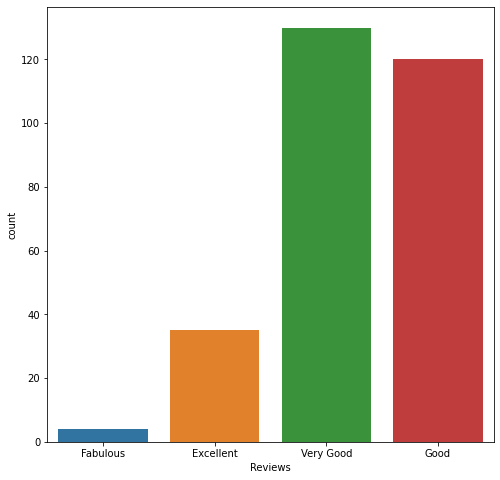

In [44]:
plt.figure(figsize=(8,8))
sns.countplot(OYO_BudgetFriendly_df.Reviews)

##### Observation:
    In the above graph we have observed that very good review has more count than other reviews and Fabulous is very less than all

##### Where the Offer_Percentage maximum density?

#### Graph for OfferPercentage column:

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='OfferPercentage', ylabel='Density'>

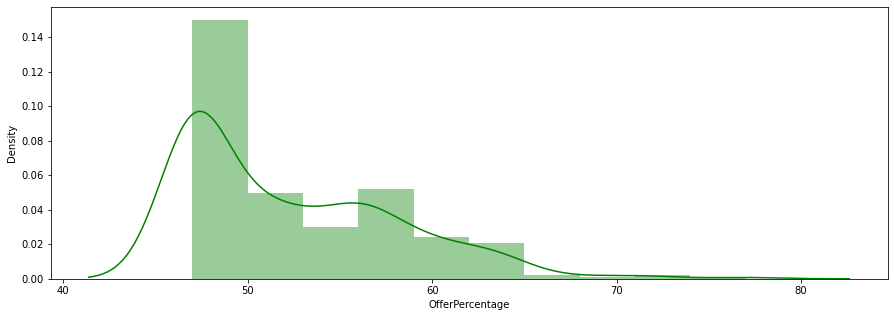

In [45]:
plt.figure(figsize=(15,5))
sns.distplot(OYO_BudgetFriendly_df['OfferPercentage'], bins = 10, color='green')
# plt.xticks(np.arange(45,85,20))
plt.show()

##### Observation:
    In  the above graph we have observed that the maximum offerpercentage is in the range of 40 to 70 but the highest offerpercentage is at 50.

##### Where the Offer_Price maximum density?

#### Graph for OfferPrice column:

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='OfferPrice', ylabel='Density'>

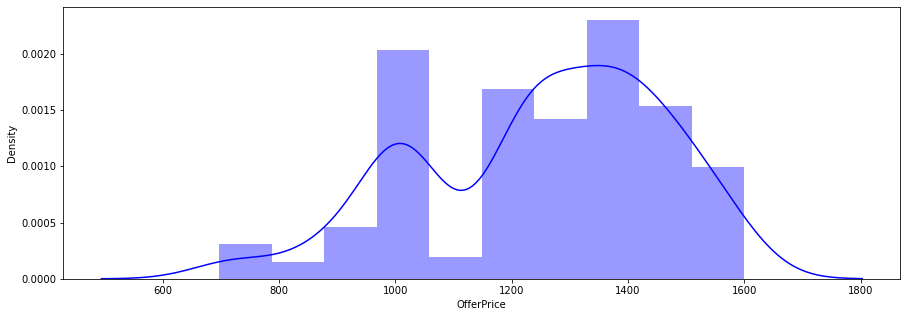

In [46]:
plt.figure(figsize=(15,5))
sns.distplot(OYO_BudgetFriendly_df['OfferPrice'], bins=10,color="blue")
# plt.xticks(np.arange(0,11,1))
plt.show()

##### Observation:
    we have observed the variation in offerprice with density and it is maximum at 1400.

##### Where the Original_Price maximum density?

#### Graph for OriginalPrice column:

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='OriginalPrice', ylabel='Density'>

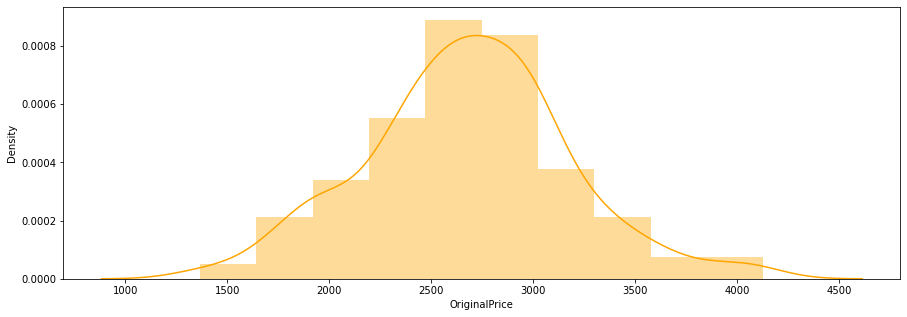

In [47]:
plt.figure(figsize=(15,5))
sns.distplot(OYO_BudgetFriendly_df['OriginalPrice'], bins=10,color="orange")
# plt.xticks(np.arange(0,11,1))
plt.show()

##### Observation:
we have observed the variation in originalprice with density and maximum at range 2500 to 3000

##### Where the Rating maximum density?

#### Graph for Rating column:

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='Density'>

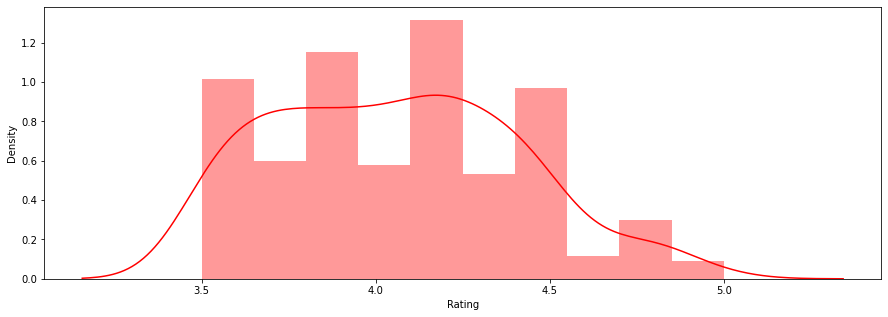

In [48]:
plt.figure(figsize=(15,5))
sns.distplot(OYO_BudgetFriendly_df['Rating'], bins=10,color="red")
# plt.xticks(np.arange(0,11,1))
plt.show()

##### Observation:
we have observed the variation in Rating with density and maximum at range of 4 to 4.5

##### what is the peak point of Offer_Percentage by using KDE plot?

#### Graph for OfferPercentage column:

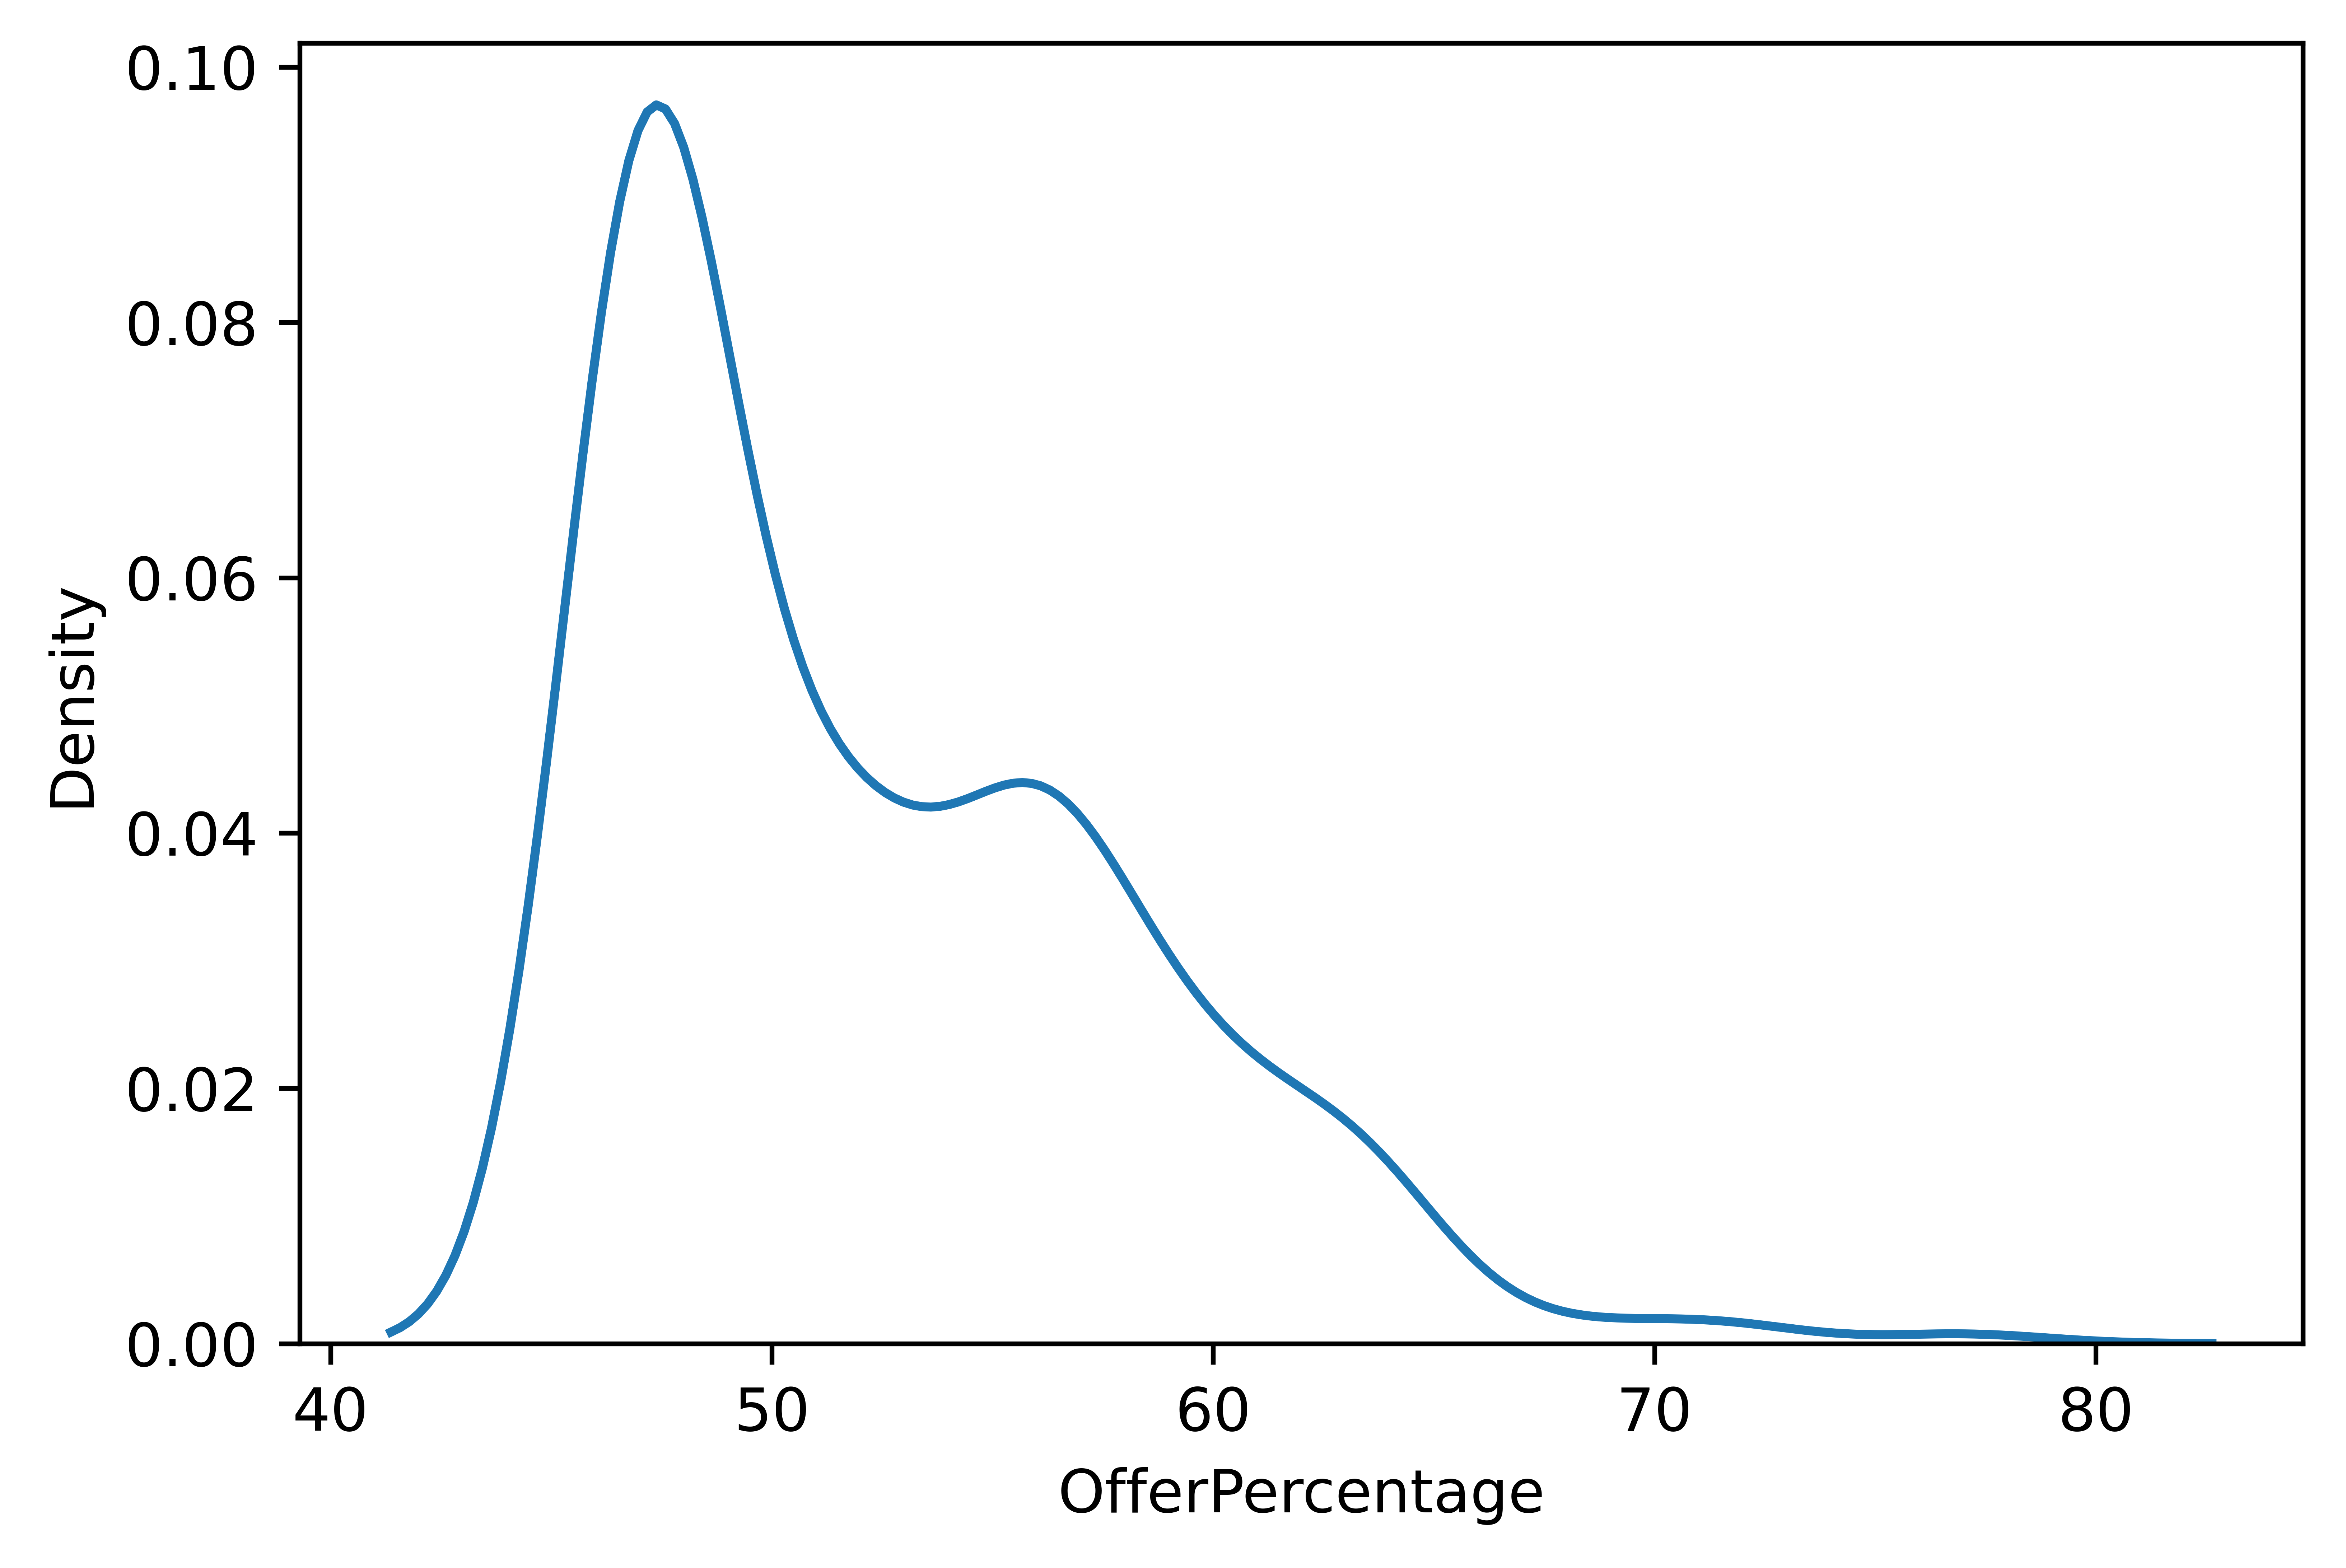

In [49]:
plt.figure(dpi=1200)
sns.kdeplot(OYO_BudgetFriendly_df['OfferPercentage']);


##### Observation:
In  the above graph we have observed that the maximum offerpercentage is in the range of 40 to 70 but the highest offerpercentage is at 47.

##### what is the AC_Availability count?

#### Graph for AC_Availability:

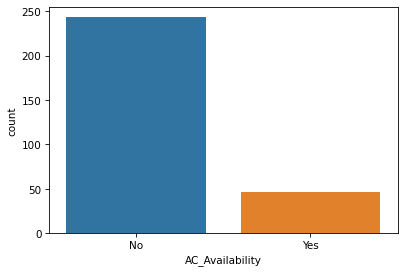

In [50]:
plt.figure(dpi = 75)
sns.countplot(x='AC_Availability',data=OYO_BudgetFriendly_df);

#### Observation:
    In the above graph we have observed that the availability of AC. The blubar indicates the not Available and Orange bar indicated the available

##### what is the Wifi_Availability count?

#### Graph for Wifi_Availability:

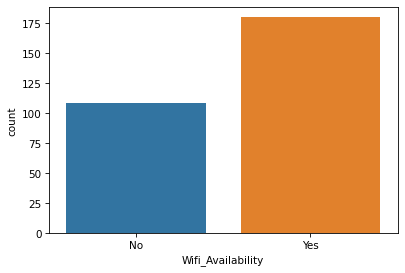

In [51]:
plt.figure(dpi = 75)
sns.countplot(x='Wifi_Availability',data=OYO_BudgetFriendly_df);

#### Observation:
    In the above graph we have observed that the availability of Wifi. The blue bar indicates the Available and Orange bar indicated the not available.
    

##### At what percentage the Offer_Percentage count is maximum ?

#### Graph for OfferPercentage:

<Figure size 1500x800 with 0 Axes>

<AxesSubplot:xlabel='OfferPercentage', ylabel='count'>

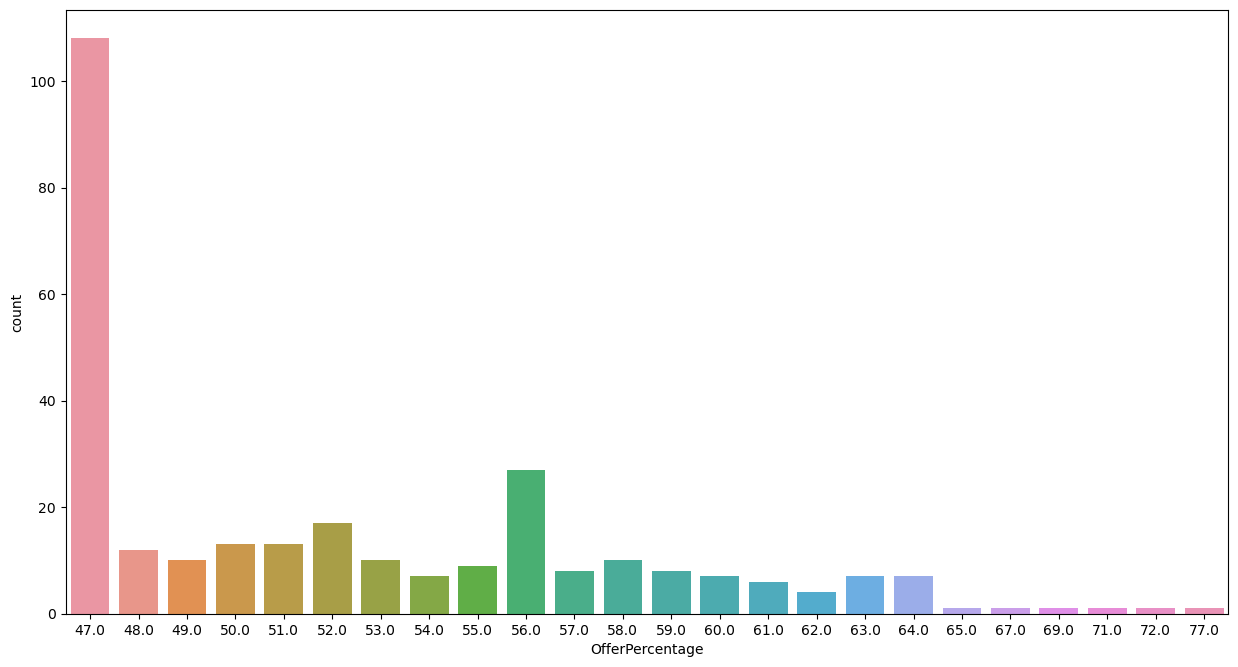

In [52]:
plt.figure(dpi=100,figsize=(15,8))
sns.countplot(OYO_BudgetFriendly_df.OfferPercentage)

#### Observation:
    In the above graph we have observed that the offerpercentage graph and in that the offer percentage has more at 47 and very low at 29 ,66,67,68,70,75.

##### Which Rating has maximum count?

#### Graph for Rating:

<Figure size 1500x800 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='count'>

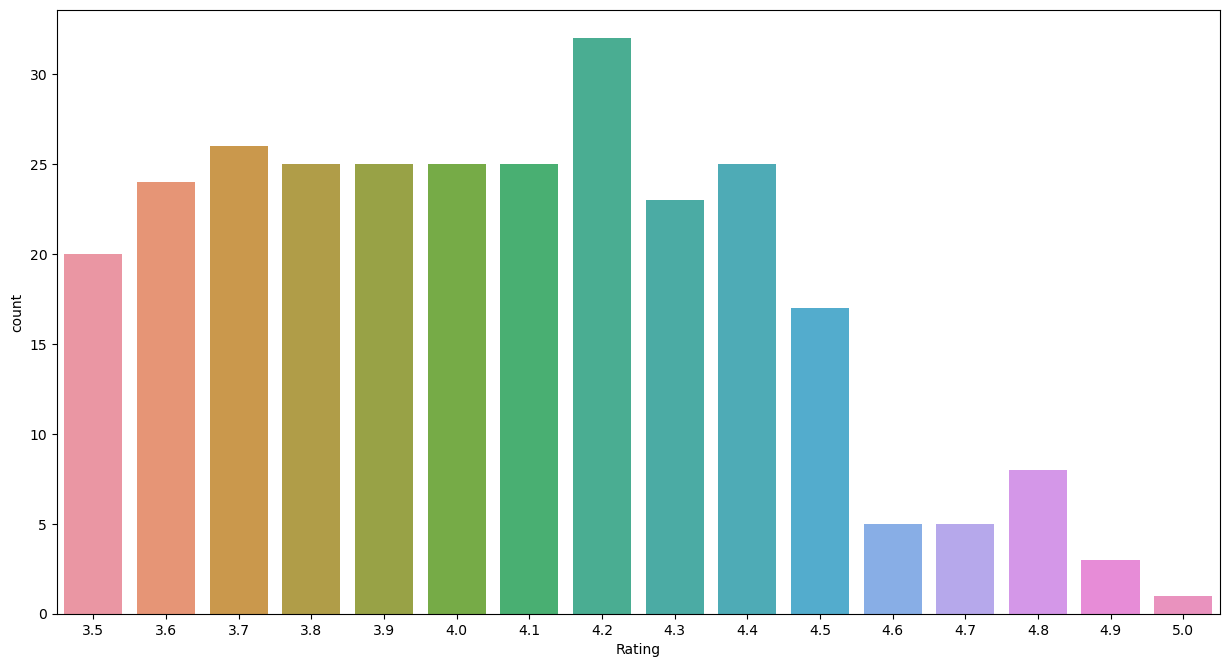

In [53]:
plt.figure(dpi=100,figsize=(15,8))
sns.countplot(OYO_BudgetFriendly_df.Rating)

#### Observation:
    In the above graph we have observed the rating graph .the highest rating is at 4.2 and lowest rating is at 5.0

### Bi Variate graphs

##### What is relation between City_Name and OriginalPrice and at what city price is maximum by violin ?

#### Graph between City_Name and OriginalPrice columns:

<Figure size 1800x1200 with 0 Axes>

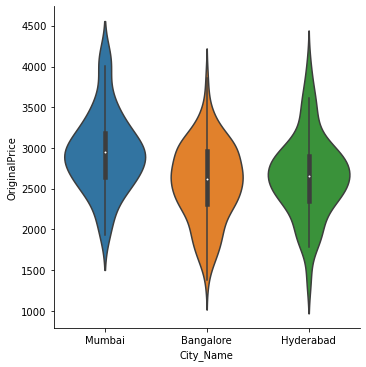

In [54]:
plt.figure(dpi = 300)
sns.catplot(x="City_Name", y="OriginalPrice", data = OYO_BudgetFriendly_df, kind='violin');

##### Observation:
    Here we have observed that the maximum original price is in city mumbai,and least price is in hyderabad.

##### At what city the OfferPrice is maximum by using barplot?

#### Graph between City_Name and OfferPrice columns:

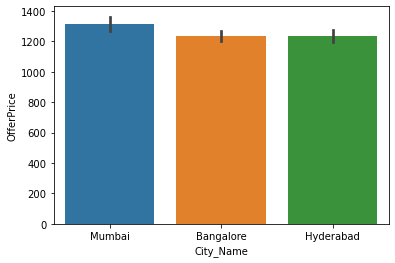

In [55]:
sns.barplot(x="City_Name", y="OfferPrice", data=OYO_BudgetFriendly_df);

##### Observation:
    we have observed that the highest offerpeice is at mumbai and then hyderabad and then banglore.
    

##### What is the variation between Offer_Percentage and Original_Price by using line plot?

#### Graph between OfferPercentage and OriginalPrice columns:

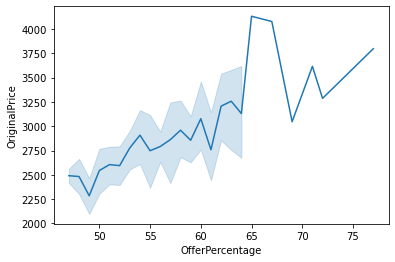

In [56]:
sns.lineplot(x="OfferPercentage", y="OriginalPrice",data=OYO_BudgetFriendly_df);

#### Observation:
    In the above graph the graph is between offerpercentage and originalprice.The offer percentage is low at 30 where the originalprice is below 2000and above 1500.
    and the originalprie is 4000 and the offerpercentage is above 70.
    
* Line chart is used when you want to emphasize changes in values for one variable (plotted on the vertical axis) for continuous values of a second variable (plotted on the horizontal).

On the horizontal axis, you need a variable that depicts continuous values that have a regular interval of measurement - like minute, hour, day, week, or month etc.,

On the vertical axis, you will report the value of a second numeric variable for points that fall in each of the intervals defined by the horizontal-axis variable.

##### What is the variation between Offer_Percentage and Original_Price by using reg plot?

#### Graph between OfferPercentage and OriginalPrice columns:

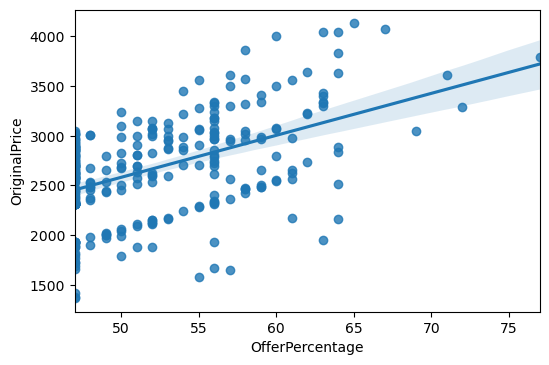

In [57]:
plt.figure(dpi = 100)
sns.regplot(x="OfferPercentage", y="OriginalPrice", data=OYO_BudgetFriendly_df);

##### Definition of Regression line:
    A regression line is a straight line that describes how a response variable y changes as an explanatory
variable x changes. We often use a regression line to predict
the value of y for a given value of x.

##### Observation:
    The above graph is between originalprice and offerpercentage.we have observed a regressionline where the lowest percentage is at 30 where price is below 2000 and highest percentage is at 70 where the original price is4000.

##### What is the variation between Offer_Price and Rating by using reg plot?

#### Graph between OfferPrice and Rating columns:

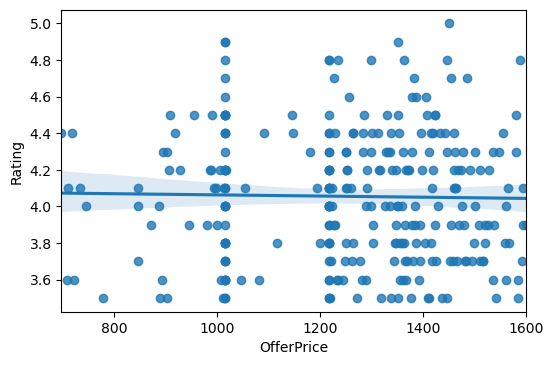

In [58]:
plt.figure(dpi = 100)
sns.regplot(x="OfferPrice", y="Rating", data=OYO_BudgetFriendly_df);

##### Observation:
    There is a graph between offerprice and rating and we observed that a regression line. 
    The Regression Line is the line that best fits the data, such that the overall distance from the line to the points (variable values) plotted on a graph is the smallest.

##### How is the Wifi_Availability according to Original_Price by using Box plot to analise the outlayers ?

#### Graph between Wifi_Availability and OriginalPrice columns:

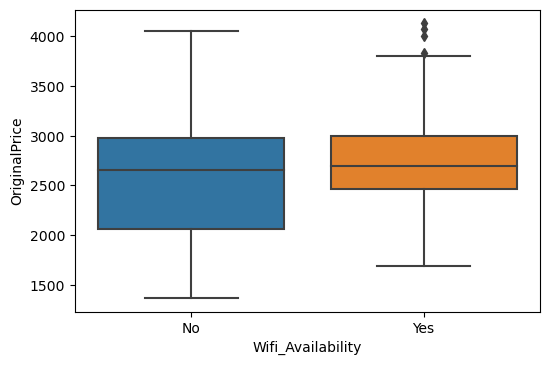

In [59]:
plt.figure(dpi = 100)
sns.boxplot(x="Wifi_Availability", y="OriginalPrice", data = OYO_BudgetFriendly_df);

#### Observation:
    The graph is between OriginalPrice and Wifi_Availability . The blue box indicates wifi is not available and orange box indicates availability of wifi.
    The wifi availability is present where the original price is between above 2500 upto 3000.and we have outliers three where there is wifiavailability.
    i.e., below 2000 and above 3500.

##### What is the Relation between Reviews and Wifi_Availability by using crosstab ?

#### Graph between Reviews and Wifi_Availability:

<Figure size 450x300 with 0 Axes>

<AxesSubplot:title={'center':'Reviews Vs Wifi_Availability'}, xlabel='Reviews'>

<Figure size 450x300 with 0 Axes>

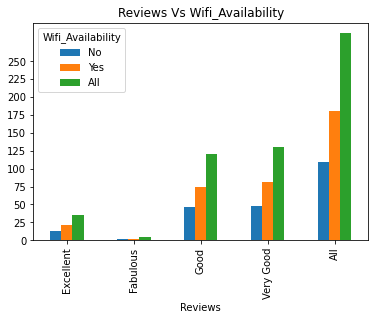

In [60]:
plt.figure(dpi = 75)
pd.crosstab(OYO_BudgetFriendly_df["Reviews"],OYO_BudgetFriendly_df["Wifi_Availability"], margins=True).plot(kind="bar", yticks=np.arange(0,260,25),title ="Reviews Vs Wifi_Availability")
plt.show()

#### Observation:
    We have a graph between Reviews and wifiavailability.
    Blue colour indicates wifi is not available and orange indicates there is a wifi availabiity.
    We have maximum wifi availability at all review and minimum at excellent review
    

##### How is the Wifi_Availability according to Offer_Price by using Box plot to analise the outlayers ?

#### Graph between Wifi_Availability and OfferPrice columns:

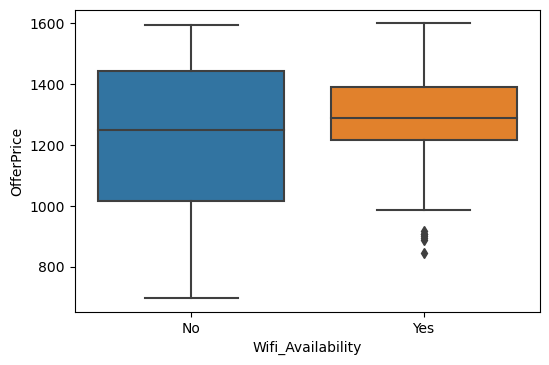

In [61]:
plt.figure(dpi = 100)
sns.boxplot(x="Wifi_Availability", y="OfferPrice", data = OYO_BudgetFriendly_df);

#### Observation:
    the graph is between offerprice and wifiavailability.The blue box indicates no wifi.The orange box indicates there is wifi .
    there is an outliers in orange box below 1000 i.e., there is wifi availability where offer price is below 1000.

##### what is the Realtion between City_Name and AC_Availability by using crosstab ?

#### Graph between City_Name and AC_Availability columns:

<AxesSubplot:xlabel='City_Name'>

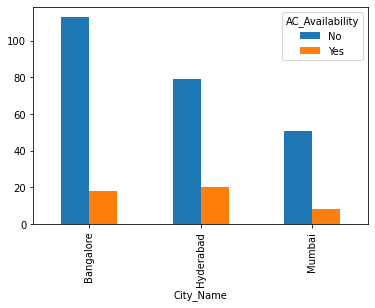

In [62]:
pd.crosstab(OYO_BudgetFriendly_df["City_Name"],OYO_BudgetFriendly_df["AC_Availability"]).plot(kind="bar")

#### Observation:
    There is a graph between cityname and AC availabillity.we have observed the blue bar indicates no ac availability and orange bar indicates there is acavailability.
    we have observed blue bar is more in banglore i.e.,there is no acavailability is more in banglore and low in mumbai.
    and also there is acavailability is more in hyderabad and low in mumbai.

##### what is the Realtion between City_Name and Wifi_Availability by using crosstab ?

#### Graph between City_Name and Wifi_Availability columns:

<AxesSubplot:xlabel='City_Name'>

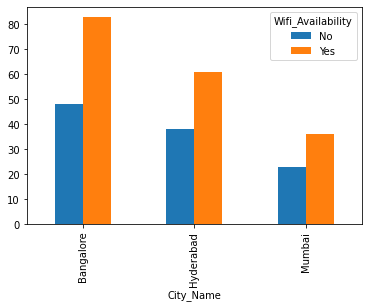

In [63]:
pd.crosstab(OYO_BudgetFriendly_df["City_Name"],OYO_BudgetFriendly_df["Wifi_Availability"]).plot(kind="bar")

#### Observation:
    There is a graph between cityname and Wifiavailabillity.we have observed the blue bar indicates no wifi availability and orange bar indicates there is wifiavailability.
    we have observed orange bar is more in banglore i.e.,there is wifiavailability is more in banglore and low in mumbai.
    and also there is no wifiavailability is more in banglore and low in mumbai. 
    

##### I have group the data for Offer_Price and City_Name where the Offer_Price is minimum ?

#### Graph for City_Name and OfferPrice columns:

<AxesSubplot:xlabel='City_Name'>

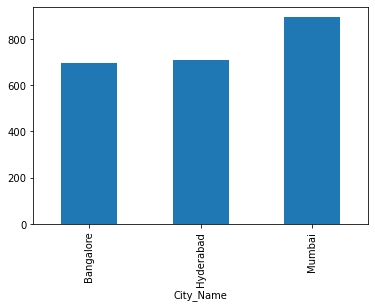

In [64]:
OYO_BudgetFriendly_df.groupby('City_Name')['OfferPrice'].min().plot(kind='bar')

#### Observation:
    There is a graph between cityname and minimum offerprice.
    we have observed that in city mumbai we have more offerprice .
    and low in banglore.
    

##### I have group the data for Offer_Price and City_Name where the Offer_Price is maximum ?

#### Graph for City_Name and OfferPrice columns:

<AxesSubplot:xlabel='City_Name'>

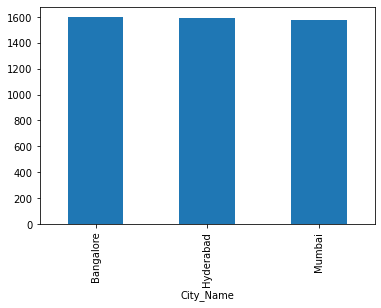

In [65]:
OYO_BudgetFriendly_df.groupby('City_Name')['OfferPrice'].max().plot(kind='bar')

#### Observation:
    There is a graph between cityname and maximum offerprice.
    we have observed there is an equal percent of maximum offer price in three cities.
    
    

##### On the basis of City_Name I have shown the analysis for all the columns by using pair plot?

#### Graph for all the columns by taking base as City_Name column:

<Figure size 7200x4800 with 0 Axes>

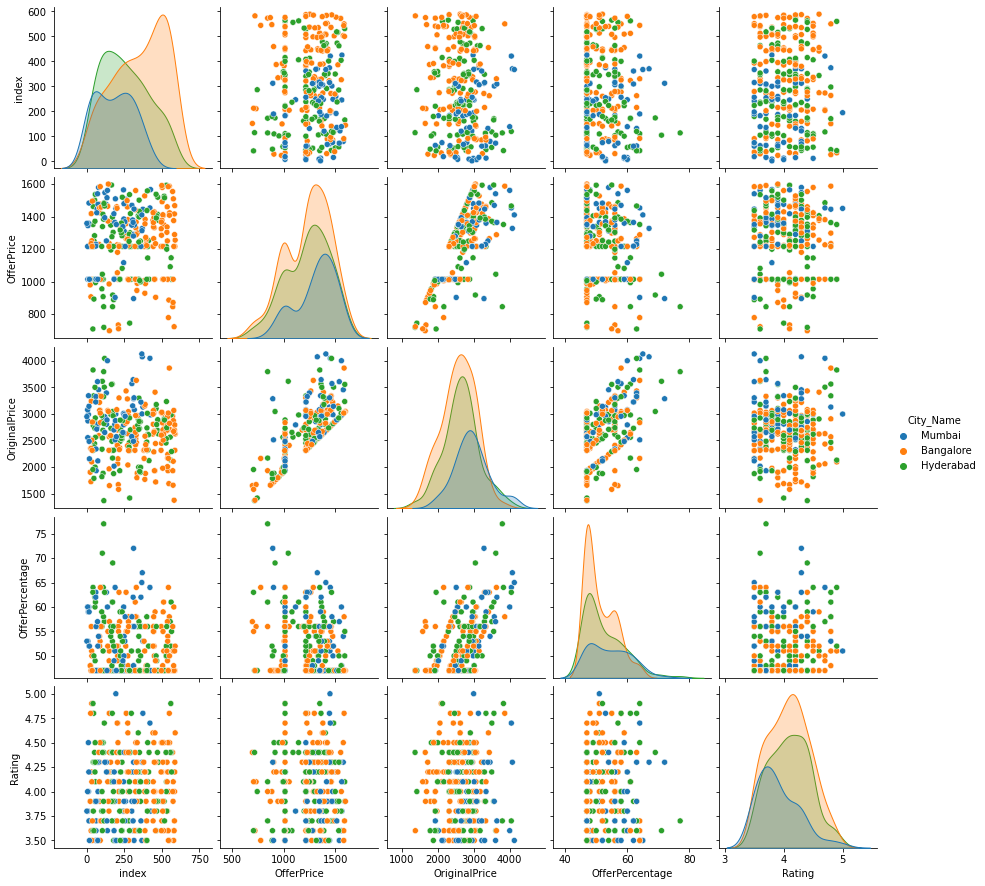

In [66]:
plt.figure(dpi = 1200)
#sns.pairplot(tips_df);
sns.pairplot(OYO_BudgetFriendly_df, hue = 'City_Name');

#### **A pairplot allows us to see both distribution of single variable and relationship between two variables.One of the simplest ways to visualize the relation between all features, the pair plot method plots all the pair relationships in the dataset at once.

#### Observation:
    Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. 
    It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.
    Hue helps you to get the difference in variable in data to map plot aspects to different colors.
    
    Here in the above graph we have taken hue as city name and blue colour indicates mumbai, orange colour indicates hyderabad and green colour indicates banglore.
    we have seen each every graph for each and every column.
    The diagonal allows us to see the distribution of a single variable 
    while the scatter plots on the upper and lower triangles show the relationship between two variables. 
    For example, the left-most plot in the second row shows the scatter plot of originalprice versus Offerprice are positively correlated.
    The default pairs plot by itself often gives us valuable insights. 
    To better show these variables in future plots, we can transform these columns by taking the logarithm of the values
    

##### I have shown subplots for Wifi_Availability by using countplot and for Rating and Offer_Percentage by using boxplot and for all the columns by using heatmap of correlation and for Offer_Percentage and Wifi_Availability by using scatter plot

#### Graphs for particular columns in an particular type of graph:

<Figure size 1800x1200 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Wifi_Availability', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Rating', ylabel='OfferPercentage'>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:xlabel='OfferPercentage', ylabel='Wifi_Availability'>

<Figure size 1800x1200 with 0 Axes>

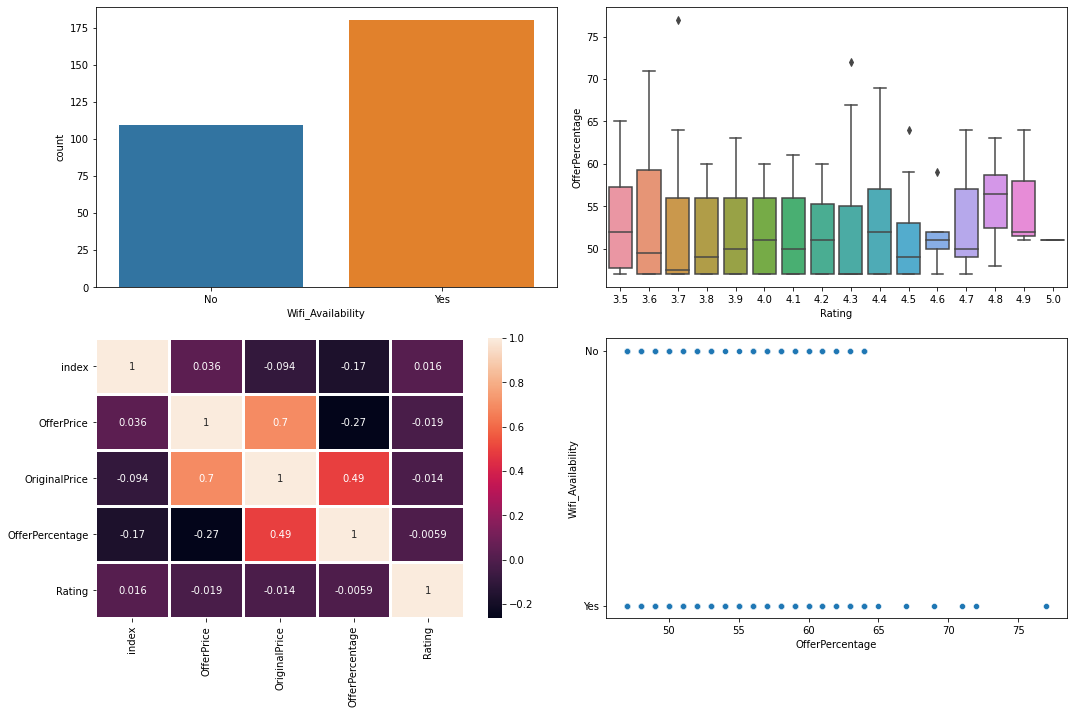

In [67]:
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.countplot(x='Wifi_Availability',data=OYO_BudgetFriendly_df)

plt.subplot(222)
sns.boxplot(x="Rating", y="OfferPercentage", data = OYO_BudgetFriendly_df)

plt.subplot(223)
sns.heatmap(OYO_BudgetFriendly_df.corr(),linecolor='white',linewidths=2,annot=True)

plt.subplot(224)
sns.scatterplot(x="OfferPercentage", y="Wifi_Availability", data=OYO_BudgetFriendly_df)

plt.tight_layout(pad= 1.0, w_pad=1.5, h_pad=1.5)

plt.show()

#### Observation:
    In above graph we have seen different type of graphs i.e., graph for wifi availability , graph for offer percentage and rating,graph for offer percentage and wifiavailability and correlation graph.
    In rating and offer percentage we have seen the outliers which indicates even though it has no offerpercentage the rating has given.
    In correlation graph we are observing the positive,negative and no correlation points.

In [68]:
OYO_BudgetFriendly_df.to_csv('/Users/navee/Desktop/DATA_SCIENCE/OYO_hotelrooms_final.csv')

#### Graph for describing problem statement:

<Figure size 1800x1200 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='City_Name'>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

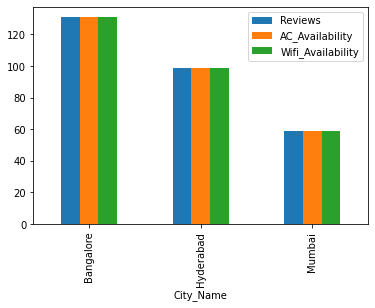

In [70]:
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))
OYO_BudgetFriendly_df.groupby('City_Name')['Reviews','AC_Availability','Wifi_Availability'].count().plot(kind='bar')

#### Observation:
    From the above graph we can conclude that city banglore has highest Reviews,ac availability and wifi availability.

#### Graph for describing problem statement:

<Figure size 1800x1200 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='City_Name'>

<Figure size 1800x1200 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

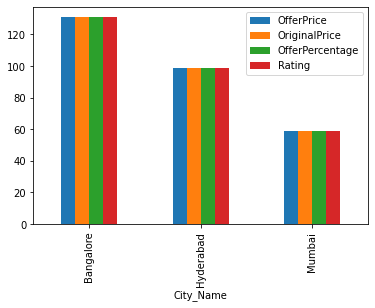

In [71]:
plt.figure(dpi = 300)
plt.figure(figsize=(15,10))
OYO_BudgetFriendly_df.groupby('City_Name')['OfferPrice','OriginalPrice','OfferPercentage','Rating'].count().plot(kind='bar')

#### Observation:
    from the above graph we can conclude that city banglore has highest offerprice,offer percentage,rating,originalprice.

#### Conclusion:
          According to  my analysis based on all the graphs the city Banglore is referred as good than compared to city Hyderabad and Mumbai to book OYO hotel rooms.